<a href="https://colab.research.google.com/github/ThakdanaiSaelee/Lab_CE888/blob/main/lab3/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from time import perf_counter

**Load data and prepossing the data**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/ce888/master/lab3/bank-additional-full.csv", delimiter=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
# Drop column duration
df = df.drop(labels='duration', axis=1)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [5]:
# Use labelEncoder to convert text data to number
column = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']
label = LabelEncoder()
for column in column:
  df[column] = label.fit_transform(df[column])
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [6]:
# No Nan value in data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  int64  
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

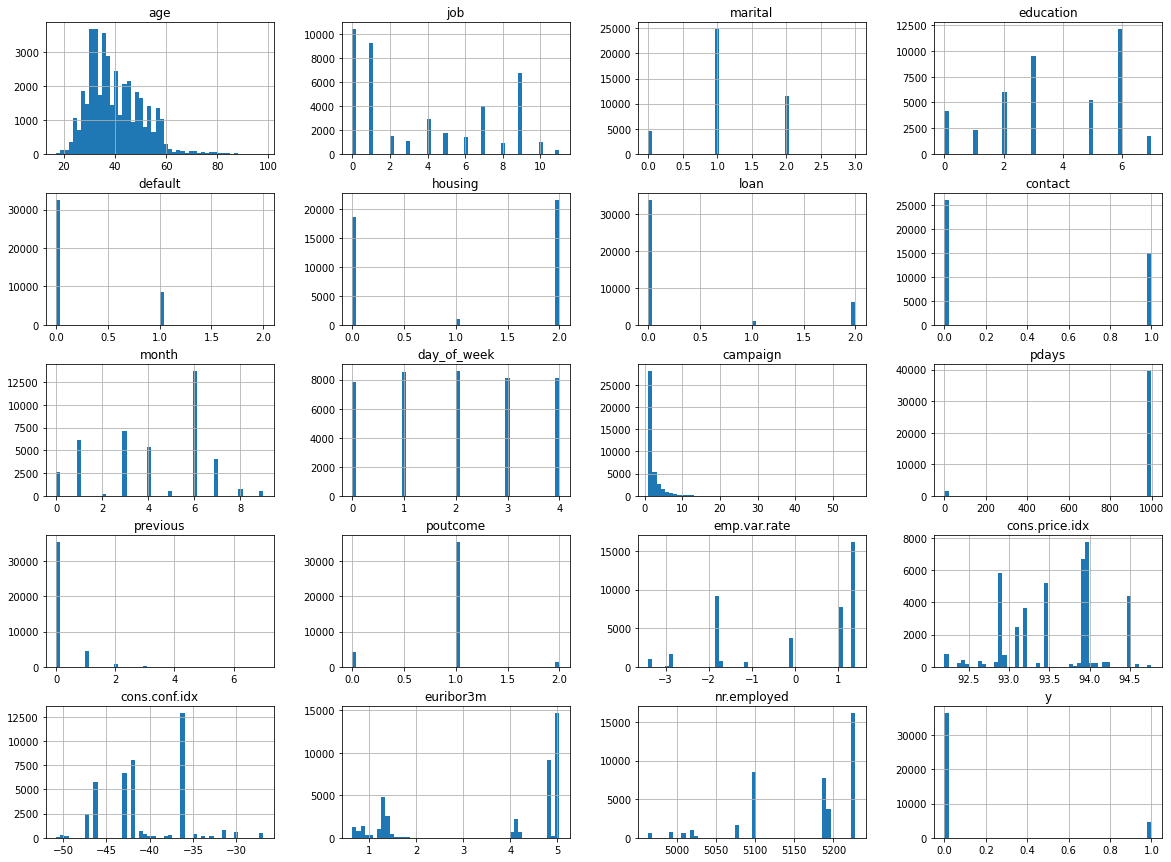

In [7]:
_ = df.hist(bins=50, figsize=(20,15))

12 columns are categorical features or 13 including output

In [ ]:
df['education'].value_counts()

6    12168
3     9515
2     6045
5     5243
0     4176
1     2292
7     1731
4       18
Name: education, dtype: int64

In [ ]:
df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [ ]:
df['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [ ]:
# label the text data to number
label = {"education": {"unknown":0, "illiterate":1, "basic.4y":2, "basic.6y":3, "basic.9y":4, "high.school":5, "professional.course":6, "university.degree":7},
         "month":{"mar":0, "apr":1, "may":2, "jun":3, "jul":4, "aug":5, "sep":6, "oct":7, "nov":8, "dec":9},
         "day_of_week": {"mon":1, "tue":2, "wed":3, "thu":4, "fri":5},
         "y":{"no":0, "yes":1}
         }
df.replace(label, inplace=True)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,2,no,no,no,telephone,2,1,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,5,unknown,no,no,telephone,2,1,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,5,no,yes,no,telephone,2,1,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,3,no,no,no,telephone,2,1,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,5,no,no,yes,telephone,2,1,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,6,no,yes,no,cellular,8,5,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,6,no,no,no,cellular,8,5,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,7,no,yes,no,cellular,8,5,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,6,no,no,no,cellular,8,5,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [8]:
# split catagory data to column
cat_data = ['job','marital', 'default', 'housing', 'loan', 'contact', 'poutcome','pdays','previous']
data = pd.get_dummies(df, columns= cat_data)
data

,age,education,month,day_of_week,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,marital_0,marital_1,marital_2,marital_3,default_0,default_1,default_2,housing_0,housing_1,housing_2,loan_0,loan_1,loan_2,contact_0,contact_1,poutcome_0,poutcome_1,poutcome_2,pdays_0,pdays_1,pdays_2,pdays_3,pdays_4,pdays_5,pdays_6,pdays_7,pdays_8,pdays_9,pdays_10,pdays_11,pdays_12,pdays_13,pdays_14,pdays_15,pdays_16,pdays_17,pdays_18,pdays_19,pdays_20,pdays_21,pdays_22,pdays_25,pdays_26,pdays_27,pdays_999,previous_0,previous_1,previous_2,previous_3,previous_4,previous_5,previous_6,previous_7
0,56,0,6,1,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,57,3,6,1,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
2,37,3,6,1,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,40,1,6,1,1,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,56,3,6,1,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,7,0,1,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
41184,46,5,7,0,1,-1.1,94.767,-50.8,1.028,4963.6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
41185,56,6,7,0,2,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
41186,44,5,7,0,1,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


In [9]:
print('Number of columns :', len(data.columns))

Number of columns : 76


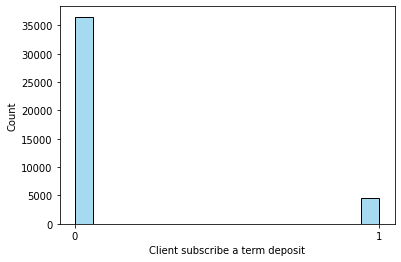

In [10]:
# plot histogram for output data
p = sns.histplot(data=data, x="y", color="skyblue")
p.set_xlabel("Client subscribe a term deposit")
p.set_xticks(range(0,2))

In [11]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [12]:
print('People who not subscribe a term deposit are',36548*100/(36548+4640),'% otherwise',4640*100/(36548+4640),'%')

People who not subscribe a term deposit are 88.73458288821988 % otherwise 11.26541711178013 %



**model the data**

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x = data.drop(labels='y', axis=1)
y = data['y']

In [15]:
# split data to training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [16]:
x, y = y_train.value_counts()
print('propotion of people who not subscribe a term deposit are %0.2f in training set' % (x/(x+y)))

propotion of people who not subscribe a term deposit are 0.89 in training set


In [17]:
x, y = y_test.value_counts()
print('propotion of people who not subscribe a term deposit are %0.2f in test set' % (x/(x+y)))

propotion of people who not subscribe a term deposit are 0.88 in test set


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.dummy import DummyClassifier

In [19]:
def boost_random(clf,round,x_train,y_train):
  score = []
  for i in range(round):
    score.append(cross_val_score(clf, x_train, y_train, cv = 10, scoring='f1'))
  return np.mean(score), np.std(score)

In [20]:
randomforest = RandomForestClassifier(n_estimators=200, max_depth=8)
mean, std = boost_random(randomforest,3,x_train,y_train)

print("randomforest f1 score: %0.4f +/- %0.4f" % (mean, std))

randomforest f1 score: 0.2990 +/- 0.0194


In [22]:
randomforest = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=60)
mean, std = boost_random(randomforest,3,x_train,y_train)

print("randomforest f1 score: %0.4f +/- %0.4f" % (mean, std))

randomforest f1 score: 0.3283 +/- 0.0160


In [24]:
randomforest = RandomForestClassifier(n_estimators=400, max_depth=12)
randomforest.fit(x_train,y_train)

RandomForestClassifier(max_depth=12, n_estimators=400)

In [25]:
import pickle as pkl

outp = open('random.pkl', 'wb')
pkl.dump(randomforest, outp, -1)  # where clf is your classifier
outp.close()

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)  

# get the folder id where you want to save your file
file = drive.CreateFile()
file.SetContentFile('random.pkl')
file.Upload() 

In [26]:
from google.colab import drive

testset = pd.concat([x_test, y_test], axis=1, join="inner")

drive.mount('/content/drive')
path = '/content/drive/My Drive/testset.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  testset.to_csv(f)

Mounted at /content/drive


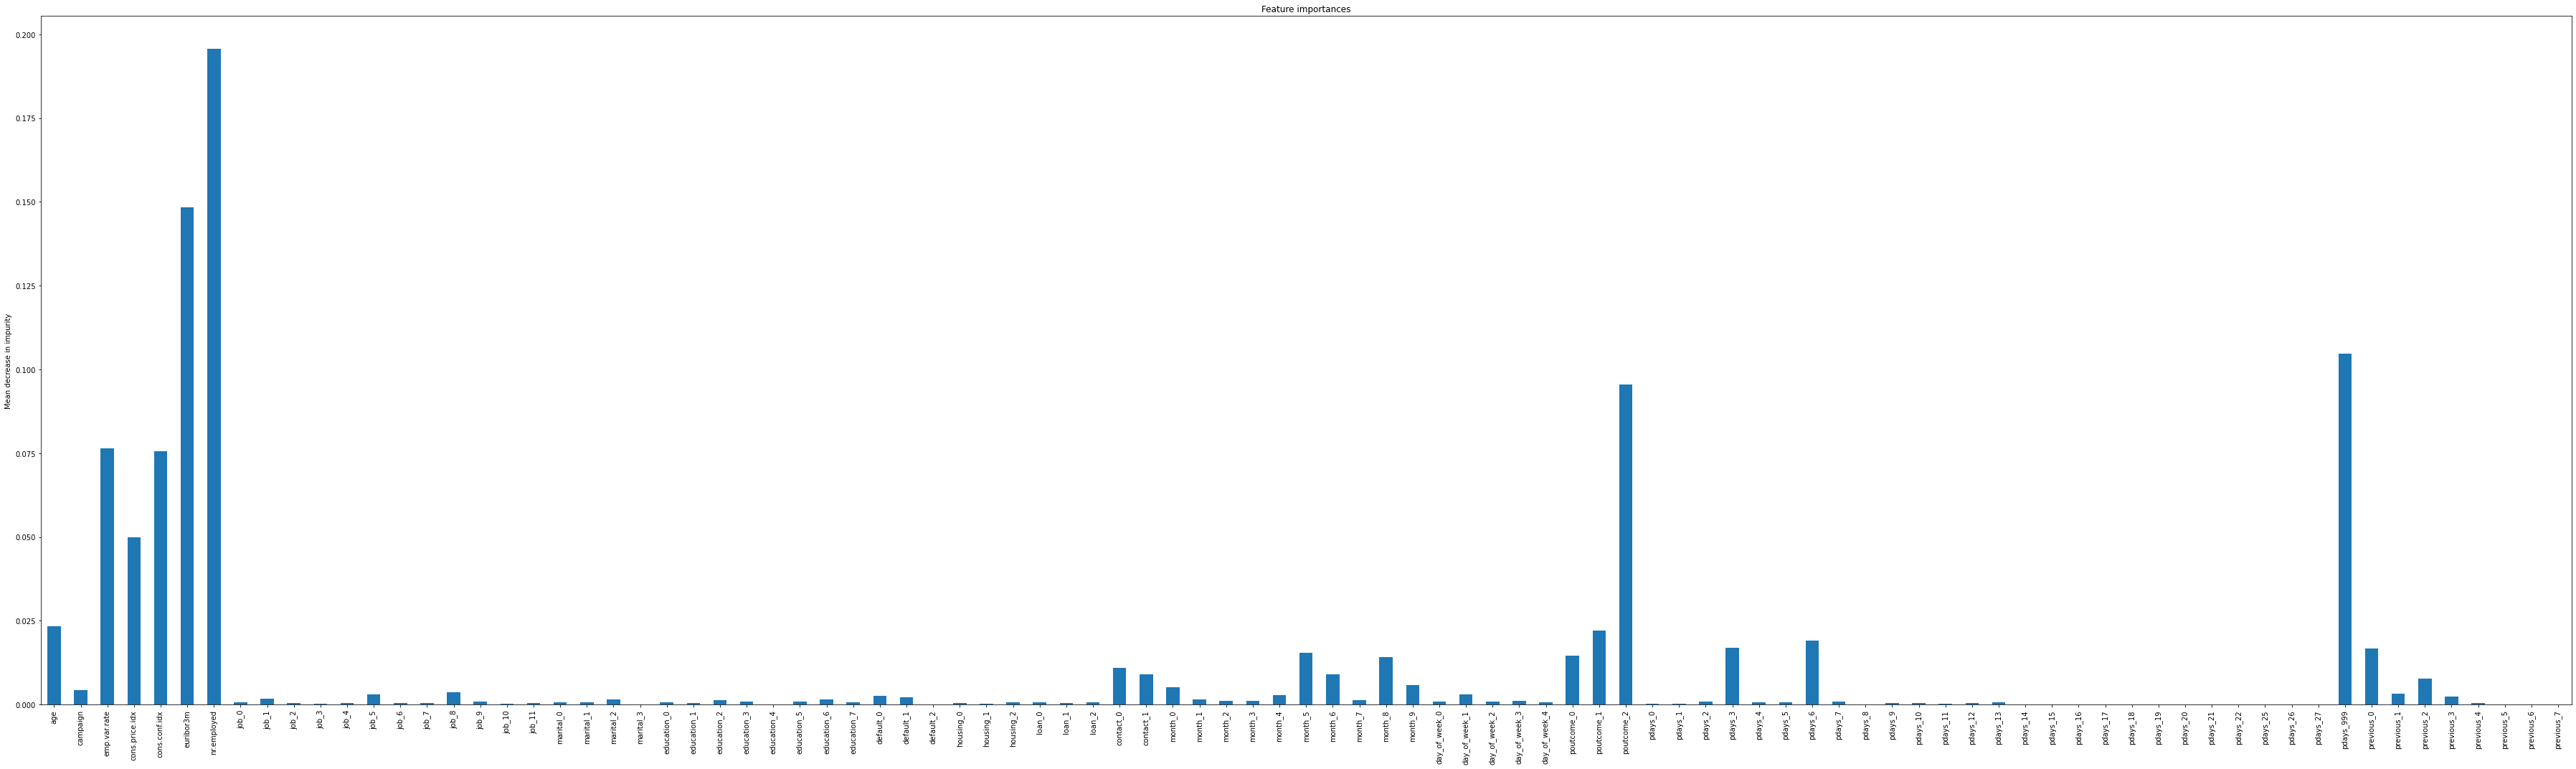

In [ ]:
feature_name = x_train.columns
importances = randomforest.feature_importances_
forest_importances = pd.Series(importances, index=feature_name)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.set_figheight(15)
fig.set_figwidth(50)
fig.tight_layout()

In [ ]:
dummy_clf = DummyClassifier(strategy='stratified')
dummy_scores = cross_val_score(dummy_clf, x_train, y_train, cv=10, scoring = 'f1')
print("dummy f1 score: %0.4f +/- %0.4f" % (dummy_scores.mean(), dummy_scores.std()))

dummy f1 score: 0.1197 +/- 0.0171


In [ ]:
from sklearn.metrics import f1_score
randomforest = RandomForestClassifier(n_estimators=1000, max_depth=8)
randomforest.fit(x_train,y_train)
y_pre = randomforest.predict(x_test)
print('f1 score:',f1_score(y_test,y_pre))

f1 score: 0.302834008097166


**Find the better model**

In [ ]:
# find randomforest parameter by griddearchCV
randomforest = RandomForestClassifier()
n_estimators = np.arange(100,1001,100)
max_depth = np.arange(2,11,2)
parameter = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
}

t1_start = perf_counter()
model_random = GridSearchCV(estimator=randomforest, param_grid=parameter, n_jobs=-1, scoring='f1')
model_random.fit(x_train, y_train)
t1_stop = perf_counter()
print('Best parameters: ', model_random.best_params_)
print('Best score: ', model_random.best_score_)
print("Elapsed time during the whole program in seconds:", t1_stop-t1_start)

Best parameters:  {'max_depth': 10, 'n_estimators': 400}
Best score:  0.3255474722662935
Elapsed time during the whole program in seconds: 1311.039283001


In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [ ]:
feature = ['euribor3m','nr.employed']
x_df = df[feature].copy()
y_df = df['y'].copy()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=50)

In [ ]:
randomforest = RandomForestClassifier()
n_estimators = np.arange(100,501,100)
max_depth = np.arange(12,13,2)
parameter = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
}

t1_start = perf_counter()
model_random = GridSearchCV(estimator=randomforest, param_grid=parameter, n_jobs=-1, scoring='f1')
model_random.fit(x_train, y_train)
t1_stop = perf_counter()
print('Best parameters: ', model_random.best_params_)
print('Best score: ', model_random.best_score_)
print("Elapsed time during the whole program in seconds:", t1_stop-t1_start)

Best parameters:  {'max_depth': 12, 'n_estimators': 300}
Best score:  0.32115166728842137
Elapsed time during the whole program in seconds: 64.66467160899992
